# Hourly heating demand for different climates

## Heating degree days by climate conditions

The amount (in degrees) and for how long (in hours) of thermal heat required to keep the indoor building temperature at a comfortable level will vary depending on different climates. The base temperature selected was set to 17 °C.

The space heating hourly profile for each location is then retrieved with a time dependency according to the heating degree method, known as the "Integration method".

The degree-days concept is most reliable for large aggregate heat quantities, for typical average buildings, and for longer time periods such as years. The concept is less reliable dor individual buildings, for low-energy buildings, and for shorter time periods, such as months [S. Werner, “District Heating and Cooling, 2013]
].

More info on calculation method: https://www.degreedays.net/introduction

In [127]:
import pandas as pd
from pandas import DataFrame
from statistics import *
import matplotlib.pyplot as plt
import numpy as np

df_ST=pd.read_excel("Stuttgart.xls", usecols=["T_amb"],squeeze=True)
df_LO=pd.read_excel("London.xls", usecols=["T_amb"], squeeze=True)
df_MA=pd.read_excel("Madrid.xls", usecols=["T_amb"], squeeze=True)
df_RO=pd.read_excel("Rome.xls", usecols=["T_amb"], squeeze=True)

In [128]:
HDD=pd.DataFrame()

In [129]:
HDD['Stuttgart_temp']=df_ST
HDD['London_temp']=df_LO
HDD['Madrid_temp']=df_MA
HDD['Rome_temp']=df_RO

In [130]:
HDD.head(10)

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp
0,-1.60,4.60,4.10,7.00
1,3.65,7.00,7.25,9.50
2,8.75,9.35,10.45,11.70
3,8.45,9.20,10.40,11.15
4,8.25,9.05,10.25,10.75
5,8.15,8.95,10.15,10.45
6,8.05,8.90,10.05,10.25
7,7.95,8.85,9.95,10.10
8,7.85,8.80,9.85,10.05
9,7.90,8.95,9.80,10.80


In [195]:
def heating_degree_hours(T_amb):
    T_base=15
    if T_amb<T_base:
        HDH=T_base-T_amb
    else:
        HDH=0
    return pd.Series(HDH)

In [196]:
HDD['HDD_Stuttgart']=HDD.apply(lambda fila: heating_degree_hours(fila['Stuttgart_temp']), axis=1)
HDD['HDD_London']=HDD.apply(lambda fila: heating_degree_hours(fila['London_temp']), axis=1)
HDD['HDD_Madrid']=HDD.apply(lambda fila: heating_degree_hours(fila['Madrid_temp']), axis=1)
HDD['HDD_Rome']=HDD.apply(lambda fila: heating_degree_hours(fila['Rome_temp']), axis=1)

In [197]:
HDD.head()

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp,HDD_Stuttgart,HDD_London,HDD_Madrid,HDD_Rome,SH_distr_Stuttgart,SH_distr_London,SH_distr_Madrid,SH_distr_Rome,SH_Stuttgart,SH_London,SH_Madrid,SH_Rome
0,-1.60,4.60,4.10,7.00,16.60,10.40,10.90,8.00,0.000268,0.000212,0.000289,0.000318,14784.895996,12713.568786,19788.360737,19300.361882
1,3.65,7.00,7.25,9.50,11.35,8.00,7.75,5.50,0.000193,0.000171,0.000218,0.000238,10611.739868,10252.878053,14956.319161,14475.271411
2,8.75,9.35,10.45,11.70,6.25,5.65,4.55,3.30,0.000119,0.000131,0.000147,0.000168,6557.816772,7843.451711,10047.578514,10229.191797
3,8.45,9.20,10.40,11.15,6.55,5.80,4.60,3.85,0.000123,0.000134,0.000148,0.000186,6796.282837,7997.244882,10124.277586,11290.711701
4,8.25,9.05,10.25,10.75,6.75,5.95,4.75,4.25,0.000126,0.000136,0.000151,0.000199,6955.260213,8151.038053,10354.374804,12062.726176


In [198]:
x=sum(HDD['HDD_Stuttgart'])
y=sum(HDD['HDD_London'])
z=sum(HDD['HDD_Madrid'])
w=sum(HDD['HDD_Rome'])

In [199]:
def SH_curve(HDH, tot_degree_hours):
    SH_prob_distr=HDH/tot_degree_hours
    return pd.Series(SH_prob_distr)

In [200]:
HDD['SH_distr_Stuttgart']=HDD.apply(lambda fila: SH_curve(fila['HDD_Stuttgart'], x ),axis=1)
HDD['SH_distr_London']=HDD.apply(lambda fila: SH_curve(fila['HDD_London'], y ),axis=1)
HDD['SH_distr_Madrid']=HDD.apply(lambda fila: SH_curve(fila['HDD_Madrid'], z ),axis=1)
HDD['SH_distr_Rome']=HDD.apply(lambda fila: SH_curve(fila['HDD_Rome'], w ),axis=1)

In [201]:
HDD.head()

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp,HDD_Stuttgart,HDD_London,HDD_Madrid,HDD_Rome,SH_distr_Stuttgart,SH_distr_London,SH_distr_Madrid,SH_distr_Rome,SH_Stuttgart,SH_London,SH_Madrid,SH_Rome
0,-1.60,4.60,4.10,7.00,16.60,10.40,10.90,8.00,0.000295,0.000234,0.000317,0.000358,14784.895996,12713.568786,19788.360737,19300.361882
1,3.65,7.00,7.25,9.50,11.35,8.00,7.75,5.50,0.000202,0.000180,0.000226,0.000246,10611.739868,10252.878053,14956.319161,14475.271411
2,8.75,9.35,10.45,11.70,6.25,5.65,4.55,3.30,0.000111,0.000127,0.000133,0.000148,6557.816772,7843.451711,10047.578514,10229.191797
3,8.45,9.20,10.40,11.15,6.55,5.80,4.60,3.85,0.000117,0.000130,0.000134,0.000172,6796.282837,7997.244882,10124.277586,11290.711701
4,8.25,9.05,10.25,10.75,6.75,5.95,4.75,4.25,0.000120,0.000134,0.000138,0.000190,6955.260213,8151.038053,10354.374804,12062.726176


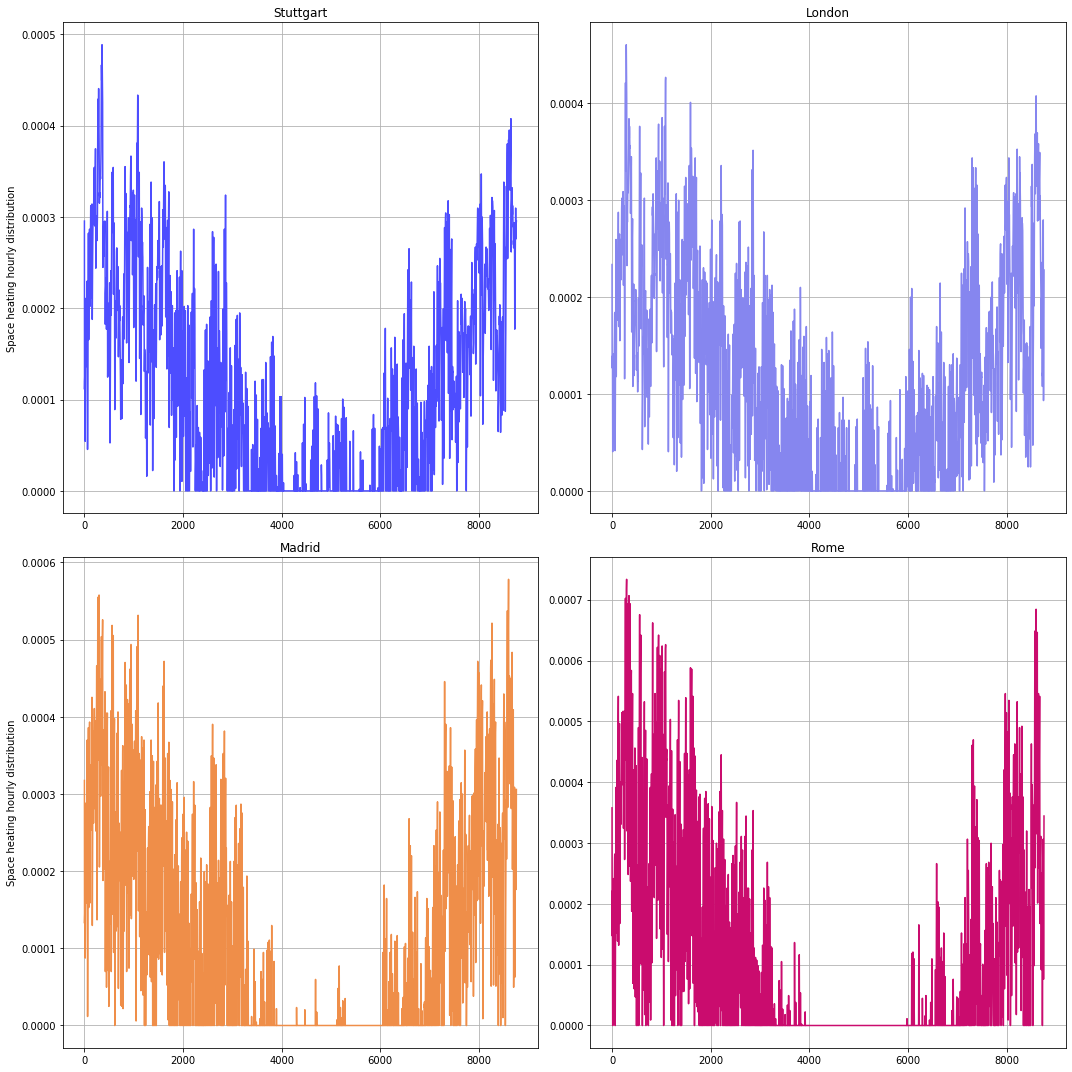

In [272]:
SH_distr_Stuttgart = HDD['SH_distr_Stuttgart']
SH_distr_London = HDD['SH_distr_London']
SH_distr_Madrid = HDD['SH_distr_Madrid']
SH_distr_Rome = HDD['SH_distr_Rome']
# if using a Jupyter notebook, include:
%matplotlib inline

# Data for plotting
t = np.arange(0, 8761, 1)


# Create a figure with 2 rows and 2 cols of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))


# Stuttgart
ax1.plot(t, SH_distr_Stuttgart, color='#4d4dff')
ax1.set_title('Stuttgart')
ax1.set_ylabel('Space heating hourly distribution')
ax1.grid()

# London
ax2.plot(t, SH_distr_London, color='#8686ef')
ax2.set_title('London')
ax2.grid()


# Madrid
ax3.plot(t, SH_distr_Madrid, color='#ef8e49')
ax3.set_title('Madrid')
ax3.set_ylabel('Space heating hourly distribution')
ax3.grid()


# Rome
ax4.plot(t, SH_distr_Rome, color= '#ca0c6e')
ax4.set_title('Rome')
ax4.grid()


fig.tight_layout()
plt.show()

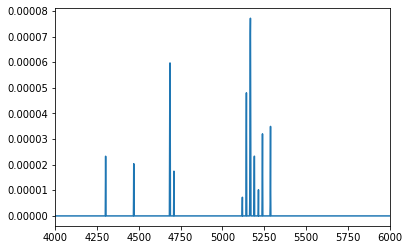

In [204]:
HDD2 = HDD['SH_distr_Madrid'].loc[4000:6000]
HDD2.plot()

# Space heating consumption

The user determines the number of buildings and building type (single family house or small-multi family house) supplied by a district heating network. Data from the Inspire project was used to estimate the annual energy consumption for each building typology in kWh/m2-y. SFHs and MFHs correspond to reference buildings in each climatic zone built between 1945-1970, non-refurbished. 

The SFH and MFH models have a fixed geometry for all the climates and periods of construction. It has been defined following the common characteristics for a European buildings. The SFH building model is composed of two storeys with a total of 100 m² of living area (Inspire project, D2.1c(2014)). The small-MFH correspond to a reference residential building that has two dwellings per floor, with a total floor area of 500 m2.

# Residential building typologies: SFH and MFH

<img src="SFH.png">        <img src="MFH.png">

# District heating system diagram

<img src="DHC_system.png">

In [215]:
# Units in [kWh/m²y] 
df_HD=pd.read_excel("Heat demand.xlsx",squeeze=True)
HD=pd.DataFrame(df_HD)

In [206]:
HD

,City,Climate,DHW_cons,SH_cons,SFH_bldg_tot,MFH_bldg_tot,%SH_y,%DHW_y
0,Stuttgart,Continental,21.7,68.9,90.6,90.6,0.760486,0.239514
1,London,Oceanic,21.8,74.8,96.6,96.6,0.774327,0.225673
2,Madrid,Southern dry,21.8,85.6,107.4,107.4,0.797020,0.202980
3,Rome,Mediterranean,21.7,75.9,97.6,97.6,0.777664,0.222336


In [207]:
# For the data visualization course, we will select 1600 MFH buildings, which will cover an area of 1 km2
n_buildings_SFH =float(input("""Enter the number of SFH buildings: 
#"""))
n_buildings_MFH=float(input("""Enter the number of MFH buildings:
#"""))

Enter the number of SFH buildings: 
# 0
Enter the number of MFH buildings:
# 1600


# Aggregate heat loads

In [208]:

def total_heat_demand(HD_SFH, HD_MFH, SH_y):
    
    HD = n_buildings_SFH*100*HD_SFH + n_buildings_MFH*500*HD_MFH
    SH = HD*SH_y
    DHW = HD*(1-SH_y)
    
    return pd.Series((HD, SH, DHW))


In [229]:
HD[['Heat demand', 'SH demand', 'DHW demand']]  = HD.apply(lambda fila: total_heat_demand(fila["SFH_bldg_tot"], fila["MFH_bldg_tot"], fila["%SH_y"]), axis=1)

#HD= HD.drop(['Total heat demand'], axis=1, errors='ignore') Eliminar una columna
HD

,City,Climate,DHW_cons,SH_cons,SFH_bldg_tot,MFH_bldg_tot,%SH_y,%DHW_y,Heat demand,SH demand,DHW demand
0,Stuttgart,Continental,21.7,68.9,90.6,90.6,0.760486,0.239514,72480000.0,55120000.0,17360000.0
1,London,Oceanic,21.8,74.8,96.6,96.6,0.774327,0.225673,77280000.0,59840000.0,17440000.0
2,Madrid,Southern dry,21.8,85.6,107.4,107.4,0.797020,0.202980,85920000.0,68480000.0,17440000.0
3,Rome,Mediterranean,21.7,75.9,97.6,97.6,0.777664,0.222336,78080000.0,60720000.0,17360000.0


In [210]:
# Total space heating load by climatic zone (kWh/year)
SH_Stuttgart = HD['SH demand'].iloc[0]
SH_London =HD['SH demand'].iloc[1]
SH_Madrid =HD['SH demand'].iloc[2]
SH_Rome =HD['SH demand'].iloc[3]


In [211]:
def get_SH_profile(SH_total, SH_profile):
   
    return SH_total * SH_profile

In [212]:
HDD

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp,HDD_Stuttgart,HDD_London,HDD_Madrid,HDD_Rome,SH_distr_Stuttgart,SH_distr_London,SH_distr_Madrid,SH_distr_Rome,SH_Stuttgart,SH_London,SH_Madrid,SH_Rome
0,-1.60,4.60,4.10,7.00,16.60,10.40,10.90,8.00,0.000295,0.000234,0.000317,0.000358,14784.895996,12713.568786,19788.360737,19300.361882
1,3.65,7.00,7.25,9.50,11.35,8.00,7.75,5.50,0.000202,0.000180,0.000226,0.000246,10611.739868,10252.878053,14956.319161,14475.271411
2,8.75,9.35,10.45,11.70,6.25,5.65,4.55,3.30,0.000111,0.000127,0.000133,0.000148,6557.816772,7843.451711,10047.578514,10229.191797
3,8.45,9.20,10.40,11.15,6.55,5.80,4.60,3.85,0.000117,0.000130,0.000134,0.000172,6796.282837,7997.244882,10124.277586,11290.711701
4,8.25,9.05,10.25,10.75,6.75,5.95,4.75,4.25,0.000120,0.000134,0.000138,0.000190,6955.260213,8151.038053,10354.374804,12062.726176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,-1.45,6.85,7.15,10.15,16.45,8.15,7.85,4.85,0.000293,0.000183,0.000229,0.000217,14665.662963,10406.671224,15109.717307,13220.747889
8757,-1.50,6.35,6.50,9.45,16.50,8.65,8.50,5.55,0.000294,0.000194,0.000248,0.000248,14705.407307,10919.315127,16106.805251,14571.773221
8758,-1.50,5.85,5.90,8.75,16.50,9.15,9.10,6.25,0.000294,0.000206,0.000265,0.000280,14705.407307,11431.959030,17027.194122,15922.798552
8759,-1.55,5.35,5.25,8.00,16.55,9.65,9.75,7.00,0.000295,0.000217,0.000284,0.000313,14745.151651,11944.602932,18024.282066,17370.325694


In [213]:
HDD['SH_Stuttgart'] = HDD.apply(lambda fila: get_SH_profile(SH_Stuttgart, fila['SH_distr_Stuttgart']), axis=1)
HDD['SH_London'] = HDD.apply(lambda fila: get_SH_profile(SH_London, fila['SH_distr_London']), axis=1)
HDD['SH_Madrid'] = HDD.apply(lambda fila: get_SH_profile(SH_Madrid, fila['SH_distr_Madrid']), axis=1)
HDD['SH_Rome'] = HDD.apply(lambda fila: get_SH_profile(SH_Rome, fila['SH_distr_Rome']), axis=1)
HDD

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp,HDD_Stuttgart,HDD_London,HDD_Madrid,HDD_Rome,SH_distr_Stuttgart,SH_distr_London,SH_distr_Madrid,SH_distr_Rome,SH_Stuttgart,SH_London,SH_Madrid,SH_Rome
0,-1.60,4.60,4.10,7.00,16.60,10.40,10.90,8.00,0.000295,0.000234,0.000317,0.000358,16283.575157,13982.894806,21741.677189,21725.188177
1,3.65,7.00,7.25,9.50,11.35,8.00,7.75,5.50,0.000202,0.000180,0.000226,0.000246,11133.649279,10756.072928,15458.531946,14936.066872
2,8.75,9.35,10.45,11.70,6.25,5.65,4.55,3.30,0.000111,0.000127,0.000133,0.000148,6130.864140,7596.476505,9075.654239,8961.640123
3,8.45,9.20,10.40,11.15,6.55,5.80,4.60,3.85,0.000117,0.000130,0.000134,0.000172,6425.145619,7798.152873,9175.386704,10455.246810
4,8.25,9.05,10.25,10.75,6.75,5.95,4.75,4.25,0.000120,0.000134,0.000138,0.000190,6621.333272,7999.829240,9474.584096,11541.506219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,-1.45,6.85,7.15,10.15,16.45,8.15,7.85,4.85,0.000293,0.000183,0.000229,0.000217,16136.434418,10957.749295,15657.996875,13170.895332
8757,-1.50,6.35,6.50,9.45,16.50,8.65,8.50,5.55,0.000294,0.000194,0.000248,0.000248,16185.481331,11630.003853,16954.518909,15071.849298
8758,-1.50,5.85,5.90,8.75,16.50,9.15,9.10,6.25,0.000294,0.000206,0.000265,0.000280,16185.481331,12302.258411,18151.308479,16972.803263
8759,-1.55,5.35,5.25,8.00,16.55,9.65,9.75,7.00,0.000295,0.000217,0.000284,0.000313,16234.528244,12974.512969,19447.830513,19009.539655


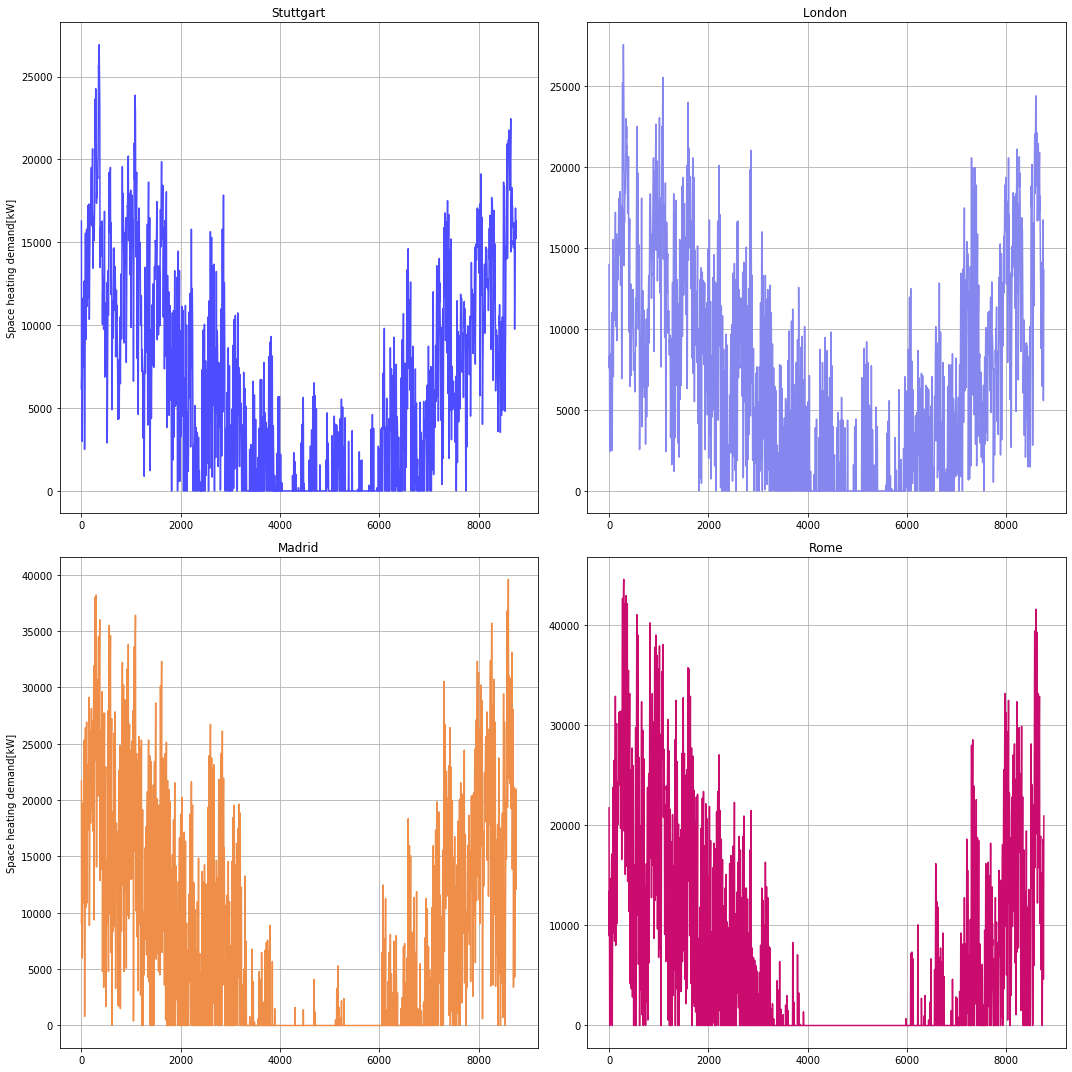

In [273]:
# Space heating hourly profile by climatic zone (kW)

SH_prof_Stuttgart = HDD['SH_Stuttgart']
SH_prof_London = HDD['SH_London']
SH_prof_Madrid = HDD['SH_Madrid']
SH_prof_Rome = HDD['SH_Rome']
# if using a Jupyter notebook, include:
%matplotlib inline

# Data for plotting
t = np.arange(0, 8761, 1)


# Create a figure with 2 rows and 2 cols of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))


# Stuttgart
ax1.plot(t, SH_prof_Stuttgart, color='#4d4dff')
ax1.set_title('Stuttgart')
ax1.set_ylabel('Space heating demand[kW]')
ax1.grid()

# London
ax2.plot(t, SH_prof_London, color='#8686ef')
ax2.set_title('London ')
ax2.grid()


# Madrid
ax3.plot(t, SH_prof_Madrid, color='#ef8e49')
ax3.set_title('Madrid')
ax3.set_ylabel('Space heating demand[kW]')
ax3.grid()


# Rome
ax4.plot(t, SH_prof_Rome, color= '#ca0c6e')
ax4.set_title('Rome')
ax4.grid()


fig.tight_layout()
plt.show()

# Domestic hot water consumption

Domestic hot water consumption is not weather influenced, and its variation is almost constant over the year. The hourly demand for hot water is estimated by the percentage of the total heat demand (HD_y) is hot water DHW_y. This data is obtained from the INSPIRE database for different climatic zones. In this particular case, the climatic zones and reference cities considered are:

* Stuttgart, Germany for Continental climate
* London, United Kingdom for Oceanic climate
* Madrid, Spain for Southern-dry climate
* Rome, Italy for Mediterranean climate

The total domestic hot water demand is evenly distributed over each day of the year, and then its hourly distribution is obtained by multiplying the daily needs by an hourly random profile. 

\begin{align*}
DHW_{d} = \frac{HD_{y}*DHW_{\%y}}{d}
\end{align*}

Text(0, 0.5, 'Daily water consumption ratio')

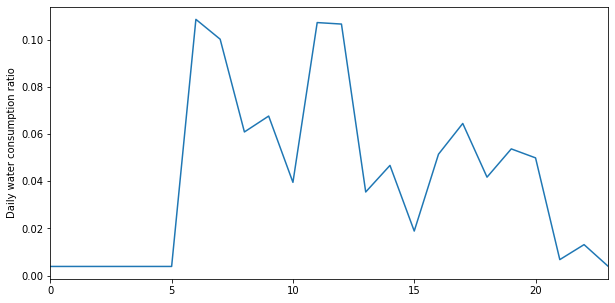

In [227]:
DHW_profile = pd.read_excel("DHW_profile.xlsx",squeeze=True)
DHW_profile['DHW_distr'].plot(figsize=(10,5))
plt.ylabel('Daily water consumption ratio', fontsize=10)

In [231]:
# Total domestic hot water consumption by climatic zone (kWh/year)
DHW_Stuttgart = HD['DHW demand'].iloc[0]
DHW_London =HD['DHW demand'].iloc[1]
DHW_Madrid =HD['DHW demand'].iloc[2]
DHW_Rome =HD['DHW demand'].iloc[3]



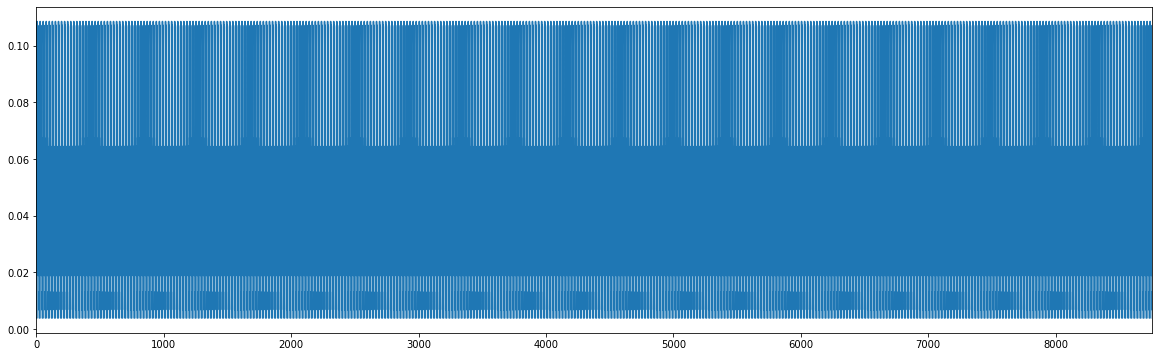

In [266]:
perfil = pd.concat([DHW_profile]*365)
perfil = perfil.reset_index(drop=True)
perfil['DHW_distr'].plot(figsize=(20,6))

In [267]:
HDD['DHW_Stuttgart'] = DHW_Stuttgart*perfil['DHW_distr']/365
HDD['DHW_London'] = DHW_London*perfil['DHW_distr']/365
HDD['DHW_Madrid'] =DHW_Madrid*perfil['DHW_distr']/365
HDD['DHW_Rome'] =DHW_Rome*perfil['DHW_distr']/365

In [268]:
HDD

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp,HDD_Stuttgart,HDD_London,HDD_Madrid,HDD_Rome,SH_distr_Stuttgart,SH_distr_London,SH_distr_Madrid,SH_distr_Rome,SH_Stuttgart,SH_London,SH_Madrid,SH_Rome,DHW_Stuttgart,DHW_London,DHW_Madrid,DHW_Rome
0,-1.60,4.60,4.10,7.00,16.60,10.40,10.90,8.00,0.000295,0.000234,0.000317,0.000358,16283.575157,13982.894806,21741.677189,21725.188177,184.777171,185.628679,185.628679,184.777171
1,3.65,7.00,7.25,9.50,11.35,8.00,7.75,5.50,0.000202,0.000180,0.000226,0.000246,11133.649279,10756.072928,15458.531946,14936.066872,184.777171,185.628679,185.628679,184.777171
2,8.75,9.35,10.45,11.70,6.25,5.65,4.55,3.30,0.000111,0.000127,0.000133,0.000148,6130.864140,7596.476505,9075.654239,8961.640123,184.777171,185.628679,185.628679,184.777171
3,8.45,9.20,10.40,11.15,6.55,5.80,4.60,3.85,0.000117,0.000130,0.000134,0.000172,6425.145619,7798.152873,9175.386704,10455.246810,184.777171,185.628679,185.628679,184.777171
4,8.25,9.05,10.25,10.75,6.75,5.95,4.75,4.25,0.000120,0.000134,0.000138,0.000190,6621.333272,7999.829240,9474.584096,11541.506219,184.777171,185.628679,185.628679,184.777171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,-1.45,6.85,7.15,10.15,16.45,8.15,7.85,4.85,0.000293,0.000183,0.000229,0.000217,16136.434418,10957.749295,15657.996875,13170.895332,2373.096165,2384.032092,2384.032092,2373.096165
8757,-1.50,6.35,6.50,9.45,16.50,8.65,8.50,5.55,0.000294,0.000194,0.000248,0.000248,16185.481331,11630.003853,16954.518909,15071.849298,322.489379,323.975506,323.975506,322.489379
8758,-1.50,5.85,5.90,8.75,16.50,9.15,9.10,6.25,0.000294,0.000206,0.000265,0.000280,16185.481331,12302.258411,18151.308479,16972.803263,624.620749,627.499186,627.499186,624.620749
8759,-1.55,5.35,5.25,8.00,16.55,9.65,9.75,7.00,0.000295,0.000217,0.000284,0.000313,16234.528244,12974.512969,19447.830513,19009.539655,184.777171,185.628679,185.628679,184.777171


In [269]:
HD_ST_tot= HDD['SH_Stuttgart'] + HDD['DHW_Stuttgart'] 
HD_LO_tot= HDD['SH_London'] + HDD['DHW_London'] 
HD_MA_tot= HDD['SH_Madrid'] +HDD['DHW_Madrid'] 
HD_RO_tot= HDD['SH_Rome'] +HDD['DHW_Rome'] 

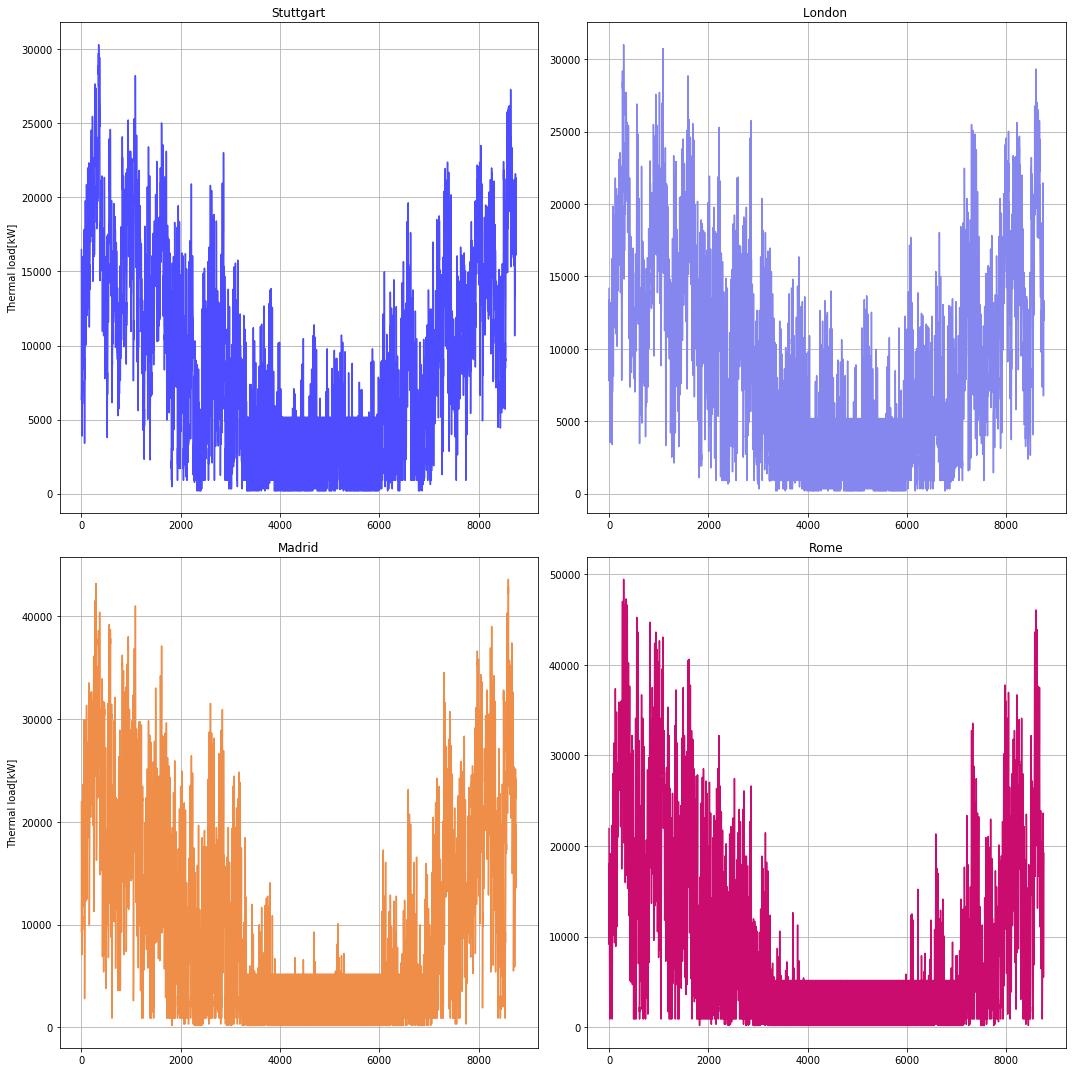

In [274]:
# Thermal load profile by climatic zone (kW)

SH_prof_Stuttgart = HDD['SH_Stuttgart']
SH_prof_London = HDD['SH_London']
SH_prof_Madrid = HDD['SH_Madrid']
SH_prof_Rome = HDD['SH_Rome']
# if using a Jupyter notebook, include:
%matplotlib inline

# Data for plotting
t = np.arange(0, 8761, 1)


# Create a figure with 2 rows and 2 cols of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))


# Stuttgart
ax1.plot(t, HD_ST_tot, color='#4d4dff')
ax1.set_title('Stuttgart')
ax1.set_ylabel('Thermal load[kW]')
ax1.grid()

# London
ax2.plot(t, HD_LO_tot, color='#8686ef')
ax2.set_title('London ')
ax2.grid()


# Madrid
ax3.plot(t, HD_MA_tot, color='#ef8e49')
ax3.set_title('Madrid')
ax3.set_ylabel('Thermal load[kW]')
ax3.grid()


# Rome
ax4.plot(t, HD_RO_tot, color= '#ca0c6e')
ax4.set_title('Rome')
ax4.grid()


fig.tight_layout()
plt.show()